## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [1]:
import numpy as np

In [2]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [4]:
## Your code HERE
c1 = x_train[y_train == 0]
c2 = x_train[y_train == 1]
m1 = np.mean(c1, axis=0)
m2 = np.mean(c2, axis=0)

In [5]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [ 0.99253136 -0.99115481] mean vector of class 2: [-0.9888012   1.00522778]


## 2. Compute the Within-class scatter matrix SW

In [6]:
## Your code HERE
sw = np.zeros((2, 2))
for x in c1:
    sw += np.dot((x - m1).reshape(2, 1), (x - m1).reshape(1, 2))
for x in c2:
    sw += np.dot((x - m2).reshape(2, 1), (x - m2).reshape(1, 2))

In [7]:
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]]


## 3.  Compute the Between-class scatter matrix SB

In [8]:
## Your code HERE
sb = np.dot((m2 - m1).reshape(2, 1), (m2 - m1).reshape(1, 2))

In [9]:
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


## 4. Compute the Fisher’s linear discriminant

In [10]:
## Your code HERE
w = np.dot(np.linalg.inv(sw), (m2 - m1).reshape(2, 1))

In [11]:
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [[-0.000224  ]
 [ 0.00056237]]


## 5. Project the test data by linear discriminant and get the class prediction by `K` nearest-neighbor rule. Please report the accuracy score with `K` values from 1 to 5
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [12]:
y_pred = [[],[],[],[],[]]
p_train = np.dot(w.T, x_train.T)[0]
p_test = np.dot(w.T, x_test.T)[0]

for test in p_test:
    d = list()
    for train in p_train:
        d.append(np.sqrt((test - train) ** 2))
    k_pred = [y_train[index] for index in np.array(d).argsort()[:5]]
    for K in range(5):
        pred = 0
        for i in range(K+1):
            if k_pred[i] == 0:
                pred -= 1
            else:
                pred += 1
        y_pred[K].append(pred > 0)

In [13]:
from sklearn.metrics import accuracy_score
for K in range(5):
    acc = accuracy_score(y_test, y_pred[K])
    print(f"Accuracy of test-set {acc} with K = {K+1}")

Accuracy of test-set 0.8488 with K = 1
Accuracy of test-set 0.8704 with K = 2
Accuracy of test-set 0.8792 with K = 3
Accuracy of test-set 0.8824 with K = 4
Accuracy of test-set 0.8912 with K = 5


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

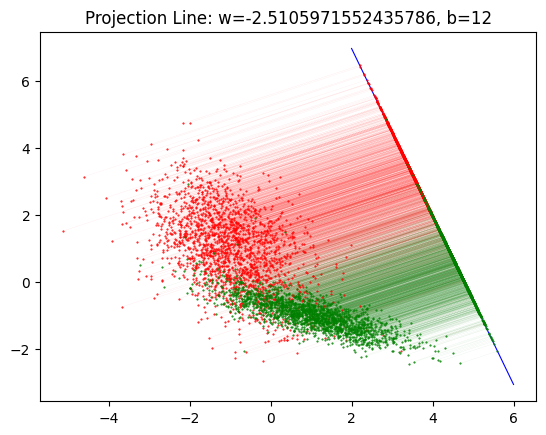

In [14]:
import matplotlib.pyplot as plt
m = w[1][0] / w[0][0]
b = 12
X = X = np.linspace(2, 6, 10)
Y = m * X + b
c1_x = c1.T[0]
c1_y = c1.T[1]
c2_x = c2.T[0]
c2_y = c2.T[1]
p1_x = (m * c1_y + c1_x - m * b) / (m**2 + 1)
p1_y = (m**2 * c1_y + m * c1_x + b) / (m**2 + 1)
p2_x = (m * c2_y + c2_x - m * b) / (m**2 + 1)
p2_y = (m**2 * c2_y + m * c2_x + b) / (m**2 + 1)
plt.title(f'Projection Line: w={m}, b={b}')
plt.plot(X, Y, c='blue', linewidth=0.8)
plt.plot([c2_x, p2_x], [c2_y, p2_y], c='red', linewidth=0.02)
plt.plot([c1_x, p1_x], [c1_y, p1_y], c='green', linewidth=0.02)
plt.plot(c2_x, c2_y, '.', c='red', markersize=1)
plt.plot(c1_x, c1_y, '.', c='green', markersize=1)
plt.plot(p2_x, p2_y, '.', c='red', markersize=1)
plt.plot(p1_x, p1_y, '.', c='green', markersize=1)